# Benchmarking Our Algorithm against others

In [1]:
import sys
sys.path.append('../')
from panav.environment.env import MultiTunnelEnv
from panav.hybrid import HybridGraph
from panav.util import flowtime,makespan
from panav.PBS.PBS import PBS
from panav.TrafficAwarePlanning import TAHP
from panav.sequential import sequential_planning
from panav.SAMP.solvers import Tube_Planning, Simple_MILP_Planning
from panav.viz import draw_hybrid,draw_env

from time import time
import pickle as pkl

%load_ext autoreload
%autoreload 2

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-15


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


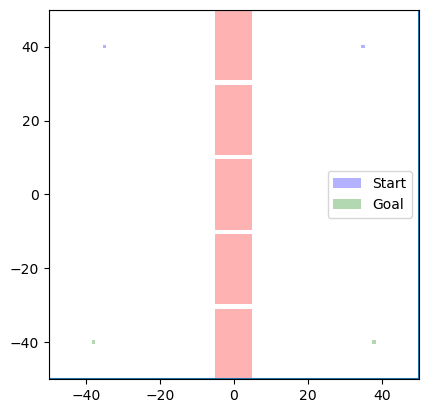

In [2]:
bloating_r = 0.5
N = 2
env = MultiTunnelEnv(n_tunnel = 4, tunnel_width = bloating_r*2.5, N_agent = N,wallthickness=10,limits=[(-50,50),(-50,50)])
HG = HybridGraph(env,bloating_r)
draw_env(HG.env,show_agent_ID=False)


In [11]:

bloating_r = 0.5
vmax = 1.0

n_agents = list(range(10,51,10))

TIMEOUT = 200 # timeout

# Algorithms
algs = {
        # "S2M2": lambda hg: PBS(hg.env,vmax=vmax,bloating_r=bloating_r,low_level_planner="Simple_MILP_Planning",TIMEOUT=TIMEOUT)[0],
        # "PBS_Tube": lambda hg: PBS(hg.env,vmax=vmax,bloating_r=bloating_r,low_level_planner="Tube_Planning")[0],
        "TAHP": lambda hg: TAHP(hg,vmax=vmax,bloating_r=bloating_r,TIMEOUT=TIMEOUT),
        # "Seq_Tube": lambda hg: sequential_planning(Tube_Planning,hg.env,vmax,bloating_r,TIMEOUT=TIMEOUT),
        # "Seq_Temp_Obs": lambda hg: sequential_planning(Simple_MILP_Planning,hg.env,vmax,bloating_r,TIMEOUT=TIMEOUT)
        }

timeouted = {alg:False for alg in algs}



results = []

env_name = "MultiTunnel_Large"


# Experiments
for i in range(len(n_agents)):
    N = n_agents[i]
    env = MultiTunnelEnv(n_tunnel = 4, tunnel_width = bloating_r*2.5, N_agent = N,wallthickness=10,limits=[(-50,50),(-50,50)])
    HG = HybridGraph(env,bloating_r)

    for name,alg in algs.items():

        if timeouted[name]:
            continue
        
        print("Alg:", name, "N agent:",N)

        result = {}
        
        t0 = time()
        plan = alg(HG)
        t = time()-t0
        
        result['plan'] = plan
        result['time'] = t

        result['N_agent'] = N
        result['alg_name'] = name
        # Save checkpoint data

        result["TIMEOUT"]=TIMEOUT
        result["HG"]=HG

        results.append(result)

        
        if t>TIMEOUT:
            timeouted[name] = True
            print("Time out for algorithm", name, "N agent = ", N)

    # Save checkpoint data
    with open("./data/{}.pkl".format(env_name),'wb') as fp:
        pkl.dump(results,fp)


0 [10, 20, 30, 40, 50]
Alg: TAHP N agent: 10
1 [10, 20, 30, 40, 50]
Alg: TAHP N agent: 20
2 [10, 20, 30, 40, 50]
Alg: TAHP N agent: 30
3 [10, 20, 30, 40, 50]
Alg: TAHP N agent: 40
4 [10, 20, 30, 40, 50]
Alg: TAHP N agent: 50


In [10]:
timeouted

{'TAHP': True}